**Name:** <br />
**Roll No:** 
***
## Instructions

- **Release Date**: **24 th Jan 2025**  
- **Deadline**: **1st Feb 2025 11:59PM**
- Kindly name your submission files as `RollNo_Name_A1.ipynb`.  <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through iPearl portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />

***


In [1]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]


***
## Example

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu(0) = \frac{1}{2}, \mu(1)= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. In the Bernoulli bandit scenario the environment generates a binary reward (either 1 or 0) by flipping a coin with the true mean of the chosen arm as the bias.  

Let the time horizon be $T=10000$. `[20 Marks]`

### E1
We take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, we run the ETC algorithm to compute the sample regret
$$ \mu(1) * T - \sum_{t=1}^T R_t, $$
where $R_t$ is the reward obtained in time step $t$.

Let us repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments.

In [3]:
## E1: ETC Demo Code ##

# Monte Carlo simulations
total_regrets = []

for _ in range(num_experiments):
    # Generate true means based on given values and arms
    mu0 = 1/2
    mu1 = 1/2 + delta

    # Initialize ETC algorithm parameters
    m = int(T**(2/3) * (np.log(T))**(1/3))
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0

    # Run ETC algorithm
    for t in range(1, T + 1):
        # Code for choosing the arm here for the ETC algorithm
        # Explore each arm m times then -> Commit to the arm with the highest empirical mean
        # store the chosen arm in the variable chosen_arm
        # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            chosen_arm = np.argmax(empirical_means)

        # Observe the reward from the environment for the chosen arm
        reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

        # Update arm_counts and empirical_means for the chosen_arm
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update total regret based on reward recieved
        # update the variable total_regret
        total_regret += mu1  - reward

    # Record total regrets over all the experiments
    total_regrets.append(total_regret)

# Calculate average regret
average_regret = np.mean(total_regrets)

print(f"Average Regret: {average_regret}")


Average Regret: 239.492


**Few Points Regarding ETC(Explore-Then-Commit) algorithm-**  <br />
The ETC (Explore-Then-Commit) algorithm is a bandit algorithm that explores each arm a certain number of times before committing to the arm with the highest estimated mean. In this case, the exploration parameter is set as $𝑚 = 𝑇^{2/3} (\log 𝑇)^{1/3}$.<br />


### E2

Now we repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$.

In [5]:
## E2: ETC regret plot for different delta ##

# Initialize lists to store results
average_regrets_etc = []

for delta in delta_values:
    total_regrets = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Initialize ETC algorithm parameters
        m = int(T**(2/3) * (np.log(T))**(1/3))
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret = 0

        # Run ETC algorithm
        for t in range(1, T + 1):
            # Code for choosing the arm for the ETC algorithm
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
            if t <= K * m:
                chosen_arm = (t - 1) % K
            else:
                # Commit to the arm with the highest empirical mean
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # update the variable total_regret
            total_regret += mu1 - reward

        # Record total regret for this experiment
        total_regrets.append(total_regret)

    # Calculate average regret for this delta
    average_regret = np.mean(total_regrets)
    average_regrets_etc.append(average_regret)

# print average regrets
print(average_regrets_etc)

[48.62999999998663, 98.80599999996241, 193.79399999990758, 292.48800000010226, 387.34399999980684, 436.4959999998944]


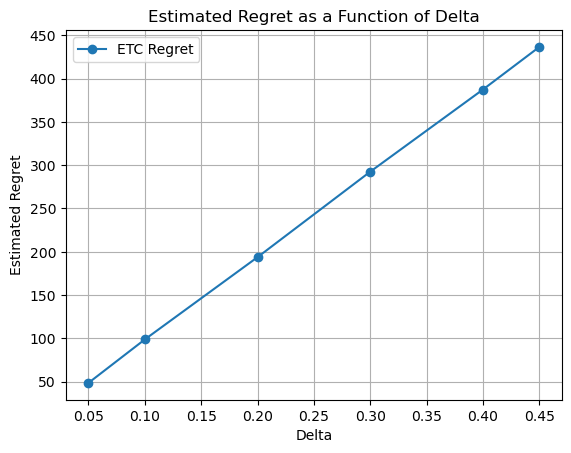

In [6]:
# Plotting
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'ETC Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

***
# Questions

### Q1: The Upper Confidence Bound (UCB) algorithm
Repeat the experiment for various values of delta using the UCB algorithm and plot the comparison with ETC. `[10 Marks]`

**The Upper Confidence Bound (UCB) algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and an exploration term. The exploration term is designed to account for uncertainty in the estimates of arm means. Here's how UCB works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the UCB algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- For each arm $a$, calculate the Upper Confidence Bound (UCB) for that arm:
  $$ UCB_t(a) = \bar{\mu}_{t-1}(a) + \sqrt{\frac{2\log(T)}{n_{t-1}(a)}} $$
  where:
  - $\mu_t(a)$ is the empirical mean of arm $a$ at time $t$.
  - $n_t(a)$ is the count of arm $a$ at time $t$.
- Choose the arm with the highest UCB: $ \text{chosen\_arm} = \underset{a}{\text{arg max}} ~ UCB_t(a) $

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen\_arm}) = n_{t-1}(\text{chosen\_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen\_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen\_arm}) (\cdot n_{t}(\text{chosen\_arm}) -1) + R_t}{n_{t}(\text{chosen\_arm})} $$


**Repeat until $t = T$.**

In [7]:
## Solution for Q1 ##

# Initialize lists to store results
average_regrets_ucb = []

# UCB constant
c_ucb = np.sqrt(3/2)

for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Initialize UCB algorithm parameters
        empirical_means = np.zeros(K)
        arm_counts = np.ones(K)  # Explore each arm once
        empirical_means = np.array([np.random.binomial(1,mu0), np.random.binomial(1,mu1)])
        total_regret_ucb = 0

        # Run UCB algorithm after exploring each arm once
        for t in range(K + 1, T + 1):
            # Calculate UCB for each arm
            # write your code here
            # [Hint] create and update a ucb_values numpy array same as the size of emperical_means
            # ucb_values = ?
            ucb_values = empirical_means + c_ucb * np.sqrt(np.log(t) / arm_counts)
            # Choose the arm with the highest UCB calculated above
            # write your code here
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            # chosen_arm = ?
            chosen_arm = np.argmax(ucb_values)
            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            # arm_counts[chosen_arm] = ?
            # empirical_means[chosen_arm] = ?
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (
                (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]
            )

            # Update total regret
            # write your code here
            # update the variable total_regret_ucb
            # total_regret_ucb = ?
            total_regret_ucb += mu1 - reward
        # Record total regret for this experiment
        total_regrets_ucb.append(total_regret_ucb)

    # Calculate average regret for this delta
    average_regret_ucb = np.mean(total_regrets_ucb)
    average_regrets_ucb.append(average_regret_ucb)

# print result
print(average_regrets_ucb)

[251.5700000000432, 499.74800000008895, 998.9640000001802, 1498.2539999997277, 1999.0540000003605, 2248.43600000013]


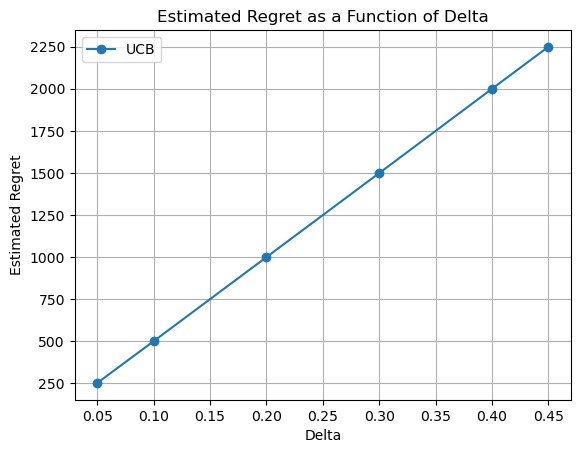

In [8]:
# Comparison of ETC and UCB algorithm.
# write your code for plotting here

plt.plot(delta_values, average_regrets_ucb, marker='o',label = 'UCB')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

### (**Bonus**) Q2: The $\epsilon$-greedy algorithm
Repeat the above experiment for various values of $\Delta$ using the $\epsilon$-greedy algorithm and plot the comparison with ETC and UCB. `[5 Marks]`

**The $\epsilon$-greedy algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and mixing it up sometimes with exploration. The exploration probabiliy $\epsilon$ designed to account for the fact that true means are not known and some exploration will help us find a better estimate of that. Here's how $\epsilon$-greedy works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the $\epsilon$-greedy algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- Toss a coin with probability of heads as $1-\epsilon$
- If we get Heads:
    - Choose the arm with the highest empirical mean: $ \text{chosen\_arm} = \underset{a}{\text{arg max}} \bar{\mu}_t(a) $
- else:
    - Choose an arm at random

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen\_arm}) = n_{t-1}(\text{chosen\_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen\_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen\_arm}) (\cdot n_{t}(\text{chosen\_arm}) -1) + R_t}{n_{t}(\text{chosen\_arm})} $$


The constant $\epsilon$ in the $\epsilon$-greedy algorithm controls the trade-off between exploration and exploitation. A common choice is $\epsilon = 0.1$.

In [1]:
## Solution for Q2 Problem ##

# Write here your modification to the code that includes this consideration for the ETC algorithm:

# Initialize lists to store results
average_regrets_egreedy = []

for delta in delta_values:
    total_regrets_egreedy = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Define the epsilon parameter
        e = 0.1

        # Initialize ETC algorithm parameters with optimized m
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret_egreedy = 0

        # Run ETC algorithm with optimized m
        for t in range(1, T + 1):
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # write code here for choosing the arm here for the $\epsilon$-greedy algorithm
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
            if np.random.rand() < e:
                chosen_arm = np.random.choice(K)  # Explore a random arm
            else:
                chosen_arm = np.argmax(empirical_means)  # Exploit the best-known arm
            # Observe the reward
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            # arm_counts[chosen_arm] = ?
            # empirical_means[chosen_arm] = ?
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (
                (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]
            )
            # Update total regret
            # write your code here
            # update the variable total_regret_egreedy
            # total_regret_egreedy = ?
            total_regret_egreedy += mu1 - reward
        # Record total regret for this experiment
        total_regrets_egreedy.append(total_regret_egreedy)

    # Calculate average regret for this delta
    average_regret_egreedy = np.mean(total_regrets_egreedy)
    average_regrets_egreedy.append(average_regret_egreedy)

# print result
print(average_regrets_egreedy)

NameError: name 'delta_values' is not defined

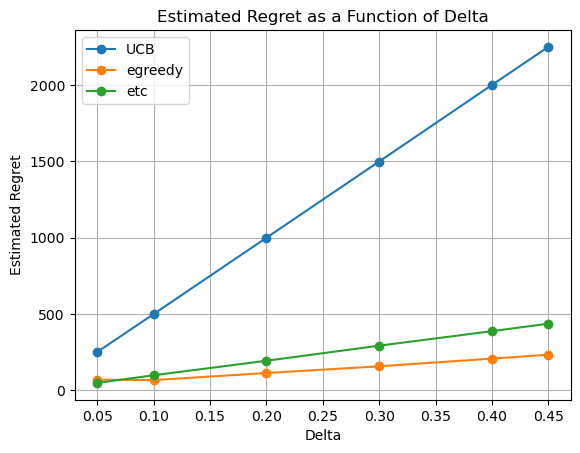

In [12]:
# Final plot containing all the Algorithm's estimated regret vs delta
# write your code for plotting here

plt.plot(delta_values, average_regrets_ucb, marker='o',label = 'UCB')
plt.plot(delta_values, average_regrets_egreedy, marker='o',label = 'egreedy')
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'etc')

plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()




**Conclusion, what do you observe?:** <br />

Write your answer here

UCB has significantly higher regret than the other algorithms for small delta
ε-greedy has relatively low regret, even for small delta
ETC starts with low regret for small delta but its regret increases as delta grows

UCB is more exploration heavy.When delta is small it takes longer for UCB to identify the optimal arm.As the delta increases ,UCBs regrest reduces but still remains relatively high compare to ε-greedy and ETC.

ε-greedy has low regret is because it balances exploration and exploitation more simply and effectively, leading to lower overall regret.
Its performance remains stable as delta increases, showing it adapts well across scenarios.

ETC starts with low regret for small delta, but its regret increases as delta grows.
This is likely due to its fixed exploration phase: it doesn't adapt dynamically. If the exploration phase is not well-tuned, it may waste time on suboptimal actions.